# Projeto de Análise de dados de Recursos Humanos

Neste projeto vamos realizar análise descritiva, diagnóstica e estatística de dados de RH (Recursos Humanos). 

Usaremos como fonte de dados reais, o dataset disponível para download no link:https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists .

Este conjunto de dados tem como objetivo entender as causas que levam uma pessoa a deixar o emprego atual. Estamos interessados em explicar a variável `target`. 
O objetivo do dataset é realizar pesquisas de RH. O dataset pode ser usado para diversos fins e neste Projeto efetuaremos o trabalho de análise de dados aplicando diversas técnicas usando linguagem Python.

## 1. Pacotes utilizados

In [6]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.12


In [7]:
# Imports

# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno

# Estatística
import scipy
from scipy.stats import normaltest

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [8]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark --iversions

missingno : 0.5.1
seaborn   : 0.11.2
numpy     : 1.21.5
sys       : 3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]
scipy     : 1.7.3
pandas    : 1.4.2
matplotlib: 3.5.1
plotly    : 5.6.0



## 2. Carregando Base de Dados

In [9]:
# Carrega o dataset
df = pd.read_csv("aug_train.csv")

In [10]:
# Shape
df.shape

(19158, 14)

In [11]:
# Colunas
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [12]:
# Amostra dos dados
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [13]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

## 3. Explorando os dados


| Coluna  | Descrição |
| ------- | --------- |
| enrollee_id       | Identificador exclusivo do candidato |
| city | Código da cidade |
| city_development_index    | Índice de desenvolvimento da cidade (em escala) |
| gender    | Gênero do candidato |
| relevent_experience | Experiência relevante do candidato |
| enrolled_university |Tipo de curso universitário matriculado, se houver |
| education_level | Nível educacional do candidato |
| major_discipline | Área de formação do candidato |
| experience | Experiência total do candidato em anos |
| company_size | Número de funcionários da empresa |
| company_type | Tipo de empresa |
| last_new_job | Diferença em anos entre o trabalho anterior e o trabalho atual |
| training_hours | Horas de treinamento concluídas |
| target | 0 – Não está à procura de mudança de emprego, 1 – Está a procura de mudança de emprego |

In [14]:
# Descrevendo os atributos categóricas
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
city,19158,123,city_103,4355
gender,14650,3,Male,13221
relevent_experience,19158,2,Has relevent experience,13792
enrolled_university,18772,3,no_enrollment,13817
education_level,18698,5,Graduate,11598
major_discipline,16345,6,STEM,14492
experience,19093,22,>20,3286
company_size,13220,8,50-99,3083
company_type,13018,6,Pvt Ltd,9817
last_new_job,18735,6,1,8040


- A maioria dos candidos é do sexo masculino, já possui experiência relevante, são graduados na área de exatas e tecnologia e possuem mais de 20 anos de experiência.

In [15]:
# Descrevando os atributos numéricos
df.drop(['enrollee_id', 'target'], axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
city_development_index,19158.0,0.828848,0.123362,0.448,0.74,0.903,0.92,0.949
training_hours,19158.0,65.366896,60.058462,1.000,23.00,47.000,88.00,336.000


* Em **city_development_index** (CDI), podemos observar que os valores médios são 0,828, a mediana 0,903 e std 0,123. Isso aponta que a maioria dos candidatos são de cidades bem desenvolvidas.


* Em **training_hours**, observamos que valores médios são 65,367, a mediana 47 e max 336. Isso aponta que existe mais candidatos com poucas horas de treinamento, porém alguns candidatos despendem muito tempo para fazer o treinamento.

### 3.1. Visualizando variáveis categóricas

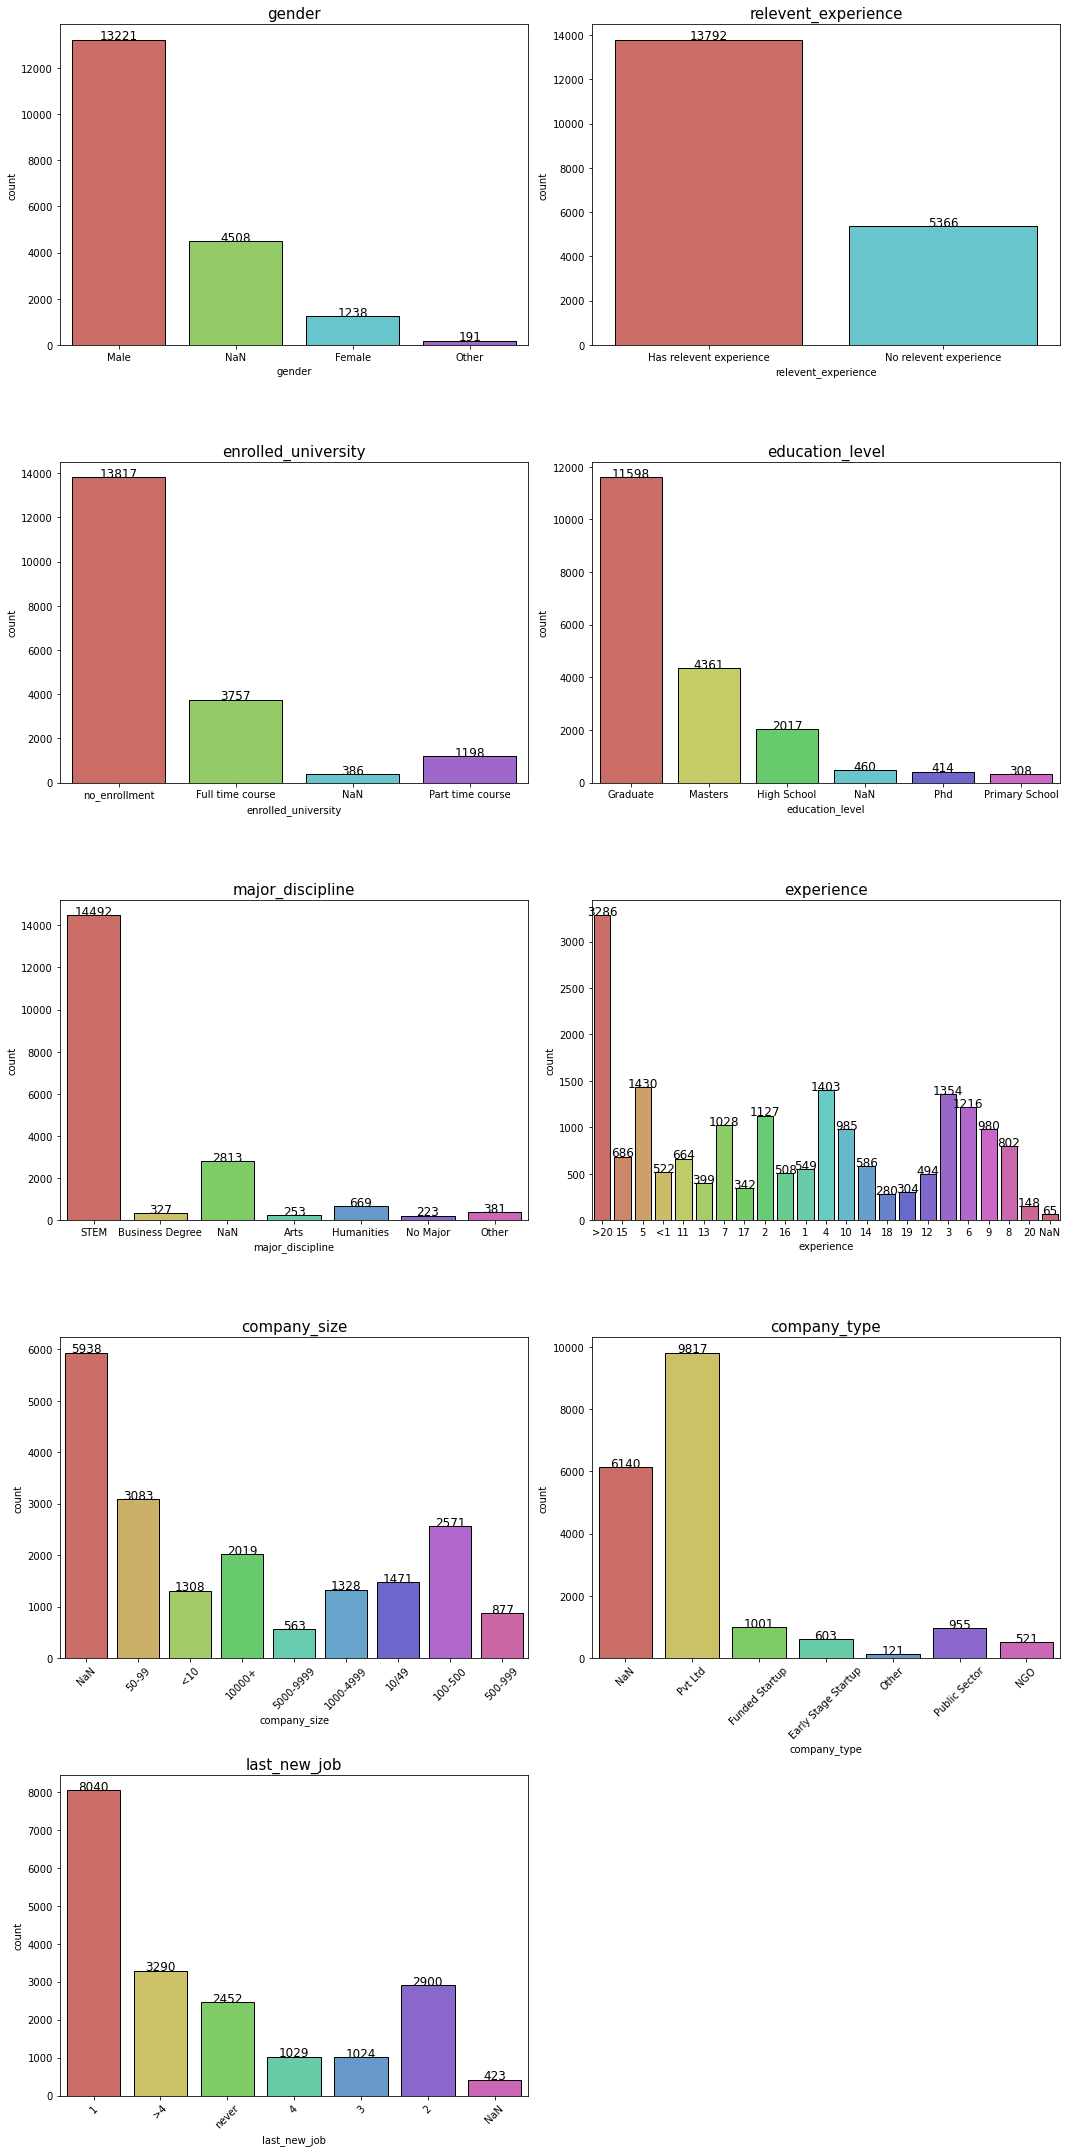

In [16]:
# Plot

# Tamanho da figura
plt.figure(figsize = (15,30))

# Lista de colunas
column_list = df.drop(['city', 'target'], axis=1).select_dtypes('object').describe()

# Contador
A = 0

# Loop
for i in column_list:
    A += 1
    plt.subplot(5, 2, A)
    ax = sns.countplot(data = df.fillna('NaN'), x = i, palette= 'hls', edgecolor = 'black')
    plt.title(i, fontsize = 15)
    # Adiciona rótulos
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 12)
    if A >= 7:
        plt.xticks(rotation = 45)

# Layout
plt.tight_layout(h_pad = 2)

### 3.2. Verificando a Distribuição das Variáveis Numéricas

In [17]:
# Descrevando os atributos numéricos
df.drop(['enrollee_id', 'target'], axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
city_development_index,19158.0,0.828848,0.123362,0.448,0.74,0.903,0.92,0.949
training_hours,19158.0,65.366896,60.058462,1.000,23.00,47.000,88.00,336.000


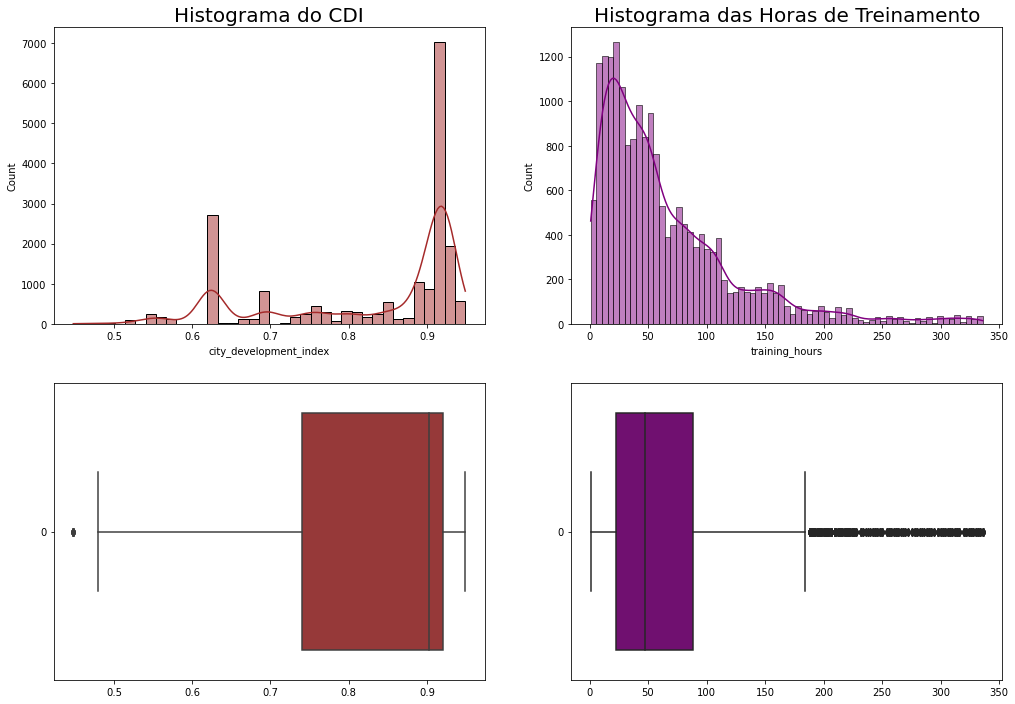

In [18]:
# Figura
plt.figure(figsize = (17,12))

# Subplots com histogramas
plt.subplot(221)
sns.color_palette("hls", 8)
sns.histplot(data = df['city_development_index'], kde = True, color = "brown")
plt.title('Histograma do CDI', fontsize = 20)

plt.subplot(222)
sns.histplot(data = df['training_hours'], kde = True, color = "purple")
plt.title('Histograma das Horas de Treinamento', fontsize = 20)

# Subplots com boxplots
plt.subplot(223)
sns.boxplot(data = df['city_development_index'], color = "brown", orient= 'horizontal')

plt.subplot(224)
sns.boxplot(data = df['training_hours'], color = "purple", orient = 'horizontal')

plt.show()

A distribuição normal é uma das distribuições de probabilidade mais importantes em estatística. Sua curva apresenta o formato de sino.

A importância da distribuição normal na estatística decorre do fato de que muitos fenômenos naturais e humanos apresentam distribuições que se aproximam da distribuição normal. Além disso, a distribuição normal tem várias propriedades matemáticas úteis que facilitam a análise estatística.

![img1](imagens/img1.png)

In [19]:
# Teste de Normalidade da Distribuição

# Lista com as variáveis numéricas
numerical_feature = ['city_development_index', 'training_hours']

# Loop
for i in numerical_feature:
    
    # Calcula a normalidade
    stats, pval = normaltest(df[i])
    
     # Checar valor-p
    if pval > 0.05:
        print(i, ': Distribuição Normal')
    else:
        print(i, ': Distribuição Não Normal')

city_development_index : Distribuição Não Normal
training_hours : Distribuição Não Normal


* **city_development_index** e **training_hours** são variáveis que não seguem a distribuição normal. Precisamos usar o método nçao paramétrico para realizar a a análise numérica.

* A maior parte dos dados de **training_hours** estão localizados principalmente no lado esquerdo do histograma. Isso é um comportamento esperado pois as pessoas geralmente ficam animadas ao fazer o treinamento no início, mas nem todos que começam conseguem terminar.

### 3.3. Correlação dos Dados

#### Correlação de Spearman Entre Variáveis Numéricas

Vamos analisar a correlação entre as variáveis numéricas e entre as variáveis numéricas e a variável alvo `target`.

In [20]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [21]:
# Cria uma cópia do dataframe original
df_numerical = df.copy()

In [22]:
df_numerical["experience"].value_counts()

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

In [23]:
# Converte a variável 'experience' para numérica
df_numerical["experience"] = np.where(df_numerical["experience"] == "<1", 1, df_numerical["experience"])
df_numerical["experience"] = np.where(df_numerical["experience"] == ">20", 21, df_numerical["experience"])
df_numerical["experience"] = df_numerical["experience"].astype(float)

In [24]:
df_numerical["last_new_job"].value_counts()

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64

In [25]:
# Converte a variável last_new_job para numérica
df_numerical["last_new_job"] = np.where(df_numerical["last_new_job"] == "never", 0, df_numerical["last_new_job"])
df_numerical["last_new_job"] = np.where(df_numerical["last_new_job"] == ">4", 5, df_numerical["last_new_job"])
df_numerical["last_new_job"] = df_numerical["last_new_job"].astype(float)

In [26]:
df_numerical.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21.0,NaN,NaN,1.0,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,5.0,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,0.0,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,1.0,NaN,Pvt Ltd,0.0,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21.0,50-99,Funded Startup,4.0,8,0.0


In [27]:
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  float64
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(4), int64(2), object(8)
mem

In [28]:
# Aplica a correlação de spearman
df_numerical.drop("enrollee_id", axis = 1).corr("spearman")

,city_development_index,experience,last_new_job,training_hours,target
city_development_index,1.000000,0.300997,0.182698,0.007491,-0.279165
experience,0.300997,1.000000,0.473284,0.003569,-0.183721
last_new_job,0.182698,0.473284,1.000000,0.002959,-0.082045
training_hours,0.007491,0.003569,0.002959,1.000000,-0.014126
target,-0.279165,-0.183721,-0.082045,-0.014126,1.000000


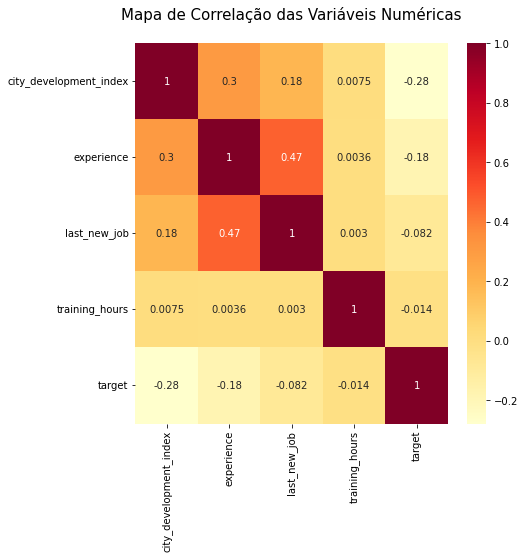

In [29]:
# Heatmap
plt.figure(figsize = (7,7))
sns.heatmap(df_numerical.drop("enrollee_id", axis = 1).corr("spearman"), annot = True, cmap = "YlOrRd")
plt.title("Mapa de Correlação das Variáveis Numéricas\n", fontsize = 15)
plt.show()

Observamos que pela correlação de spearman, `last_new_job` e `experience` têm correlação média (0,473), enquanto as demais têm correlação fraca.

As variáveis `last_new_job` e `training_hours` apresentam correlação próxima de zero com a variável alvo `target` e poderiam ser descartadas.

Para análise da relação entre as variáveis categóricas e a variável alvo, usaremos WOE e IV.

#### Weight of Evidence (WOE) e Information Value (IV)

Este conjunto de dados apresenta mais dados do tipo categórico do que tipo numérico. Portanto usaremos recursos categóricos nominais para WOE e IV.

Interpretamos o resultado de IV assim:

    Information Value, Poder de Previsão
    
    < 0.02, não deve ser usado para previsão
    0.02 - 0.1, preditor fraco
    0.1 - 0.3, preditor médio
    0.3 - 0.5, preditor forte
    > 0.5, parece bom demais para ser verdade

In [30]:
# Loop
for i in df.drop(columns = ['target',
                            'enrollee_id',
                            'city',
                            'city_development_index',
                            'training_hours',
                            'experience',
                            'last_new_job',
                            'company_size']).columns:
    
    df_woe_iv = (pd.crosstab(df[i], df['target'], normalize = 'columns')
                 .assign(woe = lambda dfx: np.log(dfx[1] / dfx[0]))
                 .assign(iv = lambda dfx: np.sum(dfx['woe'] * (dfx[1]-dfx[0]))))
    
    print(df_woe_iv,'\n------------------------------------------------------------')

target      0.0       1.0       woe        iv
gender                                       
Female  0.08098  0.096222  0.172452  0.003337
Male    0.90650  0.889020 -0.019471  0.003337
Other   0.01252  0.014758  0.164458  0.003337 
------------------------------------------------------------
target                        0.0       1.0       woe        iv
relevent_experience                                            
Has relevent experience  0.753147  0.619845 -0.194790  0.083523
No relevent experience   0.246853  0.380155  0.431784  0.083523 
------------------------------------------------------------
target                    0.0       1.0       woe        iv
enrolled_university                                        
Full time course     0.164754  0.307477  0.623947  0.118886
Part time course     0.063465  0.064890  0.022210  0.118886
no_enrollment        0.771781  0.627632 -0.206746  0.118886 
------------------------------------------------------------
target                0.0   

<Figure size 720x864 with 0 Axes>

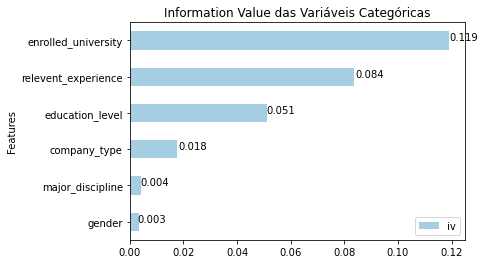

In [31]:
# Plot do Information Value

# Variáveis categóricas
columns_cat = df.drop(columns = ['target',
                                 'enrollee_id',
                                 'city',
                                 'city_development_index',
                                 'training_hours',
                                 'experience',
                                 'last_new_job',
                                 'company_size']).columns

# Lista para o IV
iv = []

# Loop
for i in columns_cat:
    df_woe_iv = (pd.crosstab(df[i], df['target'], normalize = 'columns')
                 .assign(woe = lambda dfx: np.log(dfx[1] / dfx[0]))
                 .assign(iv = lambda dfx: np.sum(dfx['woe']*(dfx[1]-dfx[0]))))
    iv.append(df_woe_iv['iv'][0])

# Dataframe
df_iv = pd.DataFrame({'Features':columns_cat,'iv':iv}).set_index('Features').sort_values(by = 'iv')

# Plot
# Figura
plt.figure(figsize = (10,12))
df_iv.plot(kind = 'barh', title = 'Information Value das Variáveis Categóricas', colormap = "Paired")
for index, value in enumerate(list(round(df_iv["iv"],3))):
    plt.text((value), index, str(value))
plt.legend(loc  = "lower right")
plt.show()

- Observamos no gráfico acima, o poder preditivo em relação ao alvo `target`.
- Com base em seu valor IV, percebemos que enrolled_university é considerado um preditor médio, relevent_experience e education_level são preditores considerados fracos e os outros são inúteis para a previsão.

### 3.4 Dados Ausentes

In [32]:
# Verificando quais colunas possuem dados faltantes
df.isna().any()

enrollee_id               False
city                      False
city_development_index    False
gender                     True
relevent_experience       False
enrolled_university        True
education_level            True
major_discipline           True
experience                 True
company_size               True
company_type               True
last_new_job               True
training_hours            False
target                    False
dtype: bool

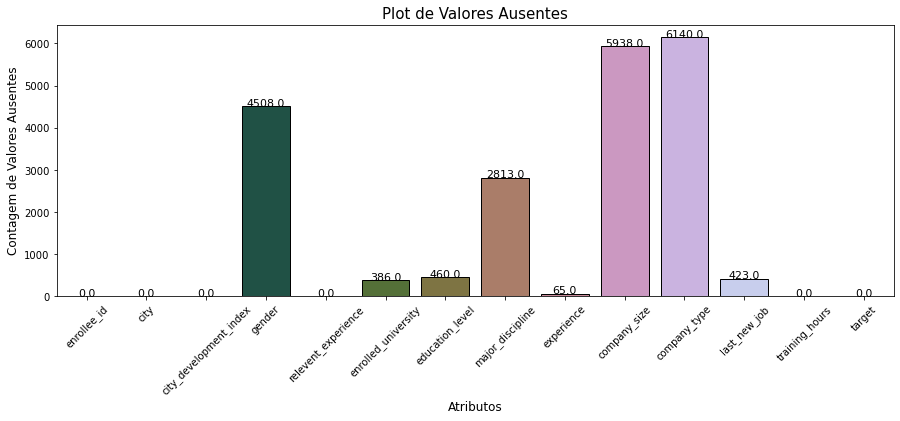

In [33]:
# Valores ausentes por coluna
null_df = df.isna().sum().reset_index()

# Figura
ax = plt.figure(figsize = (15,5))

# Barplot
ax = sns.barplot(x = null_df['index'], y = null_df[0], palette = 'cubehelix', edgecolor = 'black')
plt.xlabel('Atributos', fontsize = 12)
plt.ylabel('Contagem de Valores Ausentes', fontsize = 12)
plt.xticks(rotation = 45)
plt.title("Plot de Valores Ausentes", fontsize = 15)

# Adiciona rótulos
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, (p.get_height())), ha = 'center', color = 'black', size = 11)

plt.show()

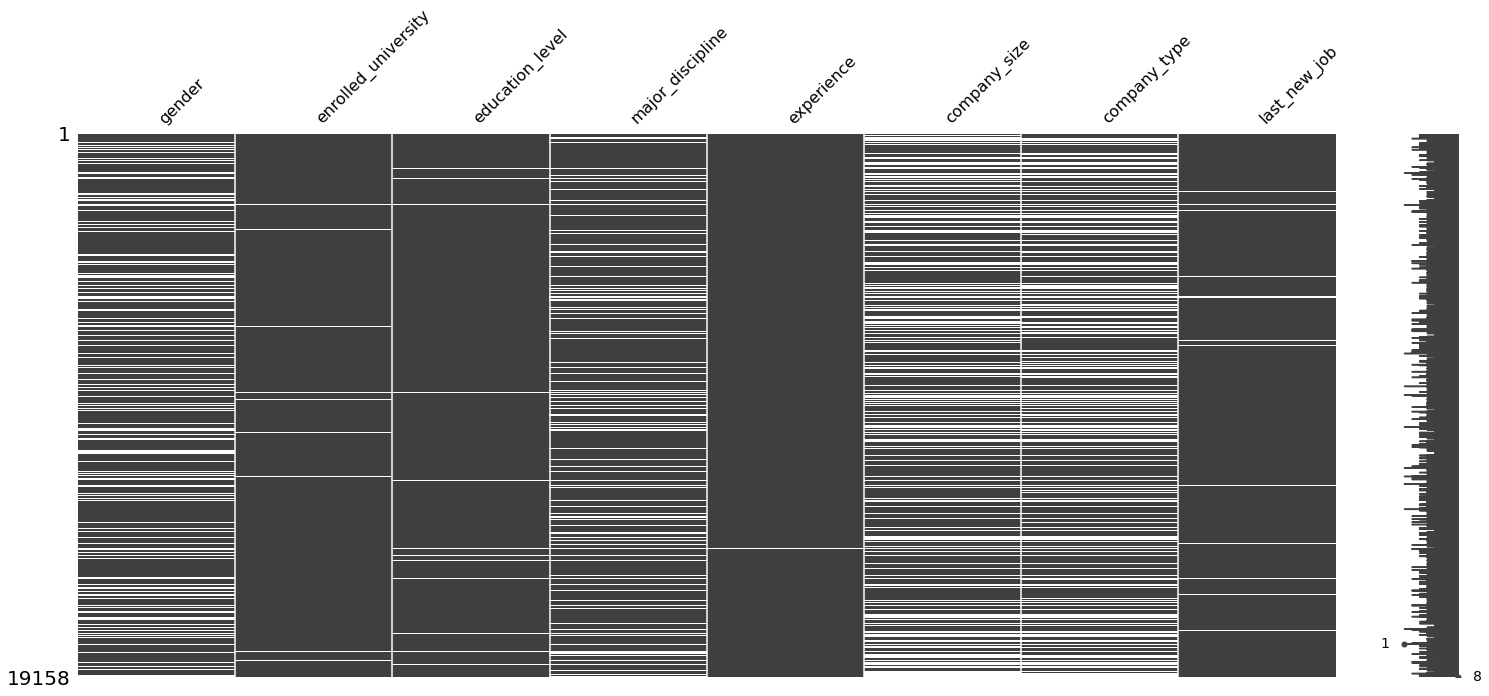

In [34]:
# Gera a visualização

# Dataframe
df_nan = pd.DataFrame(df.isna().sum())

# Plot - Mapa de Valores Ausentes
if df.isna().any(axis = None):
    missingno.matrix(df[df_nan[df_nan[0]>0].index])
    plt.show()

* Os valores ausentes em cada coluna possuem um padrão aleatório.

#### Identificando Valores Duplicados

In [35]:
# Checando valores duplicados
df['enrollee_id'].duplicated().sum()

0

#### Identificando Dados Desbalanceados

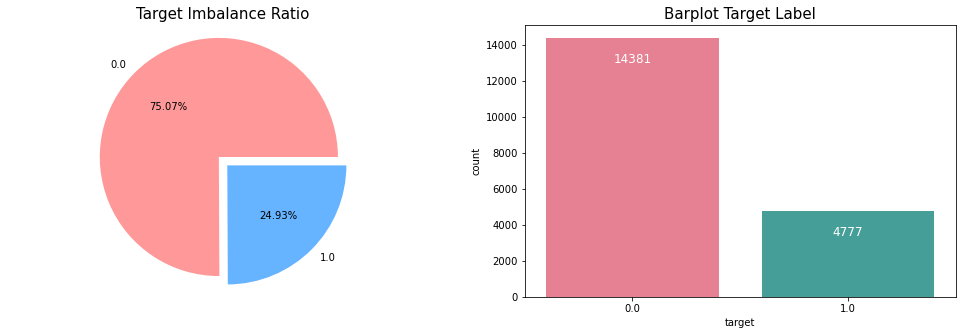

In [36]:
# Figura
plt.figure(figsize = (17,(100)/20))

plt.subplot(121)

plt.pie(round(df['target'].value_counts() / len(df) * 100, 2),
        labels = list(df['target'].value_counts().index),
        autopct = "%.2f%%",
        explode = (0,0.1),
        colors = ['#ff9999','#66b3ff'])

plt.axis("equal")
plt.title("Target Imbalance Ratio", size = 15)

plt.subplot(122)
ax = sns.countplot(data = df, x = 'target', palette = 'husl')
plt.title("Barplot Target Label", fontsize = 15)
# Adicionado rótulos
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', 
                (p.get_x()+0.4, 
                 p.get_height()), 
                ha = 'center', 
                va = 'top', 
                color = 'white', 
                size = 12)

- Podemos observar que os dados estão desbalanceados em relação à variável target.

## 4. Transformação e limpeza de dados

### 4.1. Tratando os Valores Ausentes

In [37]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [38]:
columnsToKeep = ['city_development_index', 
                  'experience', 
                  'enrolled_university', 
                  'relevent_experience', 
                  'education_level',
                  'company_type',
                  'major_discipline',
                  'target']

In [39]:
new_df = df[columnsToKeep]

In [40]:
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.920,>20,no_enrollment,Has relevent experience,Graduate,NaN,STEM,1.0
1,0.776,15,no_enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,NaN,STEM,0.0
3,0.789,<1,NaN,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,>20,no_enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0


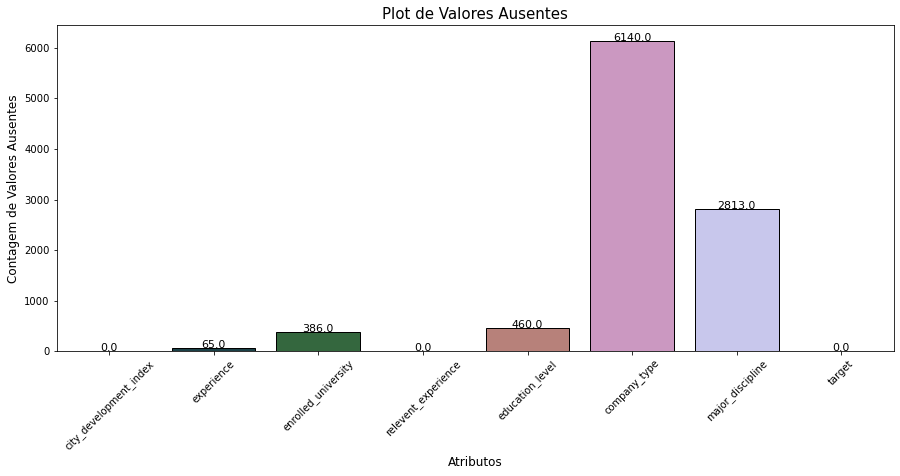

In [41]:
# Valores ausentes por coluna
null_df = new_df.isna().sum().reset_index()

# Figura
ax = plt.figure(figsize = (15,6))

# Barplot
ax = sns.barplot(x = null_df['index'], y = null_df[0], palette = 'cubehelix', edgecolor = 'black')
plt.xlabel('Atributos', fontsize = 12)
plt.ylabel('Contagem de Valores Ausentes', fontsize = 12)
plt.xticks(rotation = 45)
plt.title("Plot de Valores Ausentes", fontsize = 15)

# Adiciona rótulos
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, (p.get_height())), ha = 'center', color = 'black', size = 11)

plt.show()

#### Variável major_discipline

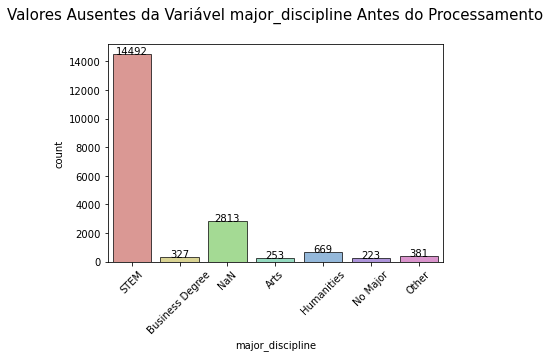

In [42]:
# Valores Ausentes da Variável major_discipline Antes do Processamento
sns.countplot(data = new_df.fillna('NaN'), x = 'major_discipline', alpha = 0.7, edgecolor = 'black', palette = 'hls')
plt.xticks(rotation = 45)
# Permite obter os limites atuais do eixo X
bound = ax.get_xbound()

# Retorna o eixo atual em que os dados estão sendo plotados. Esse eixo pode ser usado para personalizar o gráfico. 
ax = plt.gca()

# Adiciona rótulos
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
plt.title("Valores Ausentes da Variável major_discipline Antes do Processamento\n", fontsize = 15)
plt.show()

In [43]:
# Relação entre major_discipline x education_level
print('\nTotal de Valores Ausentes na Variável major_discipline:', new_df['major_discipline'].isna().sum())
print('\nProporção de Valores Ausentes na Variável education_level:')
new_df[new_df['major_discipline'].isna()]['education_level'].value_counts(dropna = False)


Total de Valores Ausentes na Variável major_discipline: 2813

Proporção de Valores Ausentes na Variável education_level:


High School       2017
NaN                460
Primary School     308
Graduate            22
Masters              6
Name: education_level, dtype: int64

Observando a proporção de valores ausentes na variável education_level.

- Decidi preencher os valores NA da variável `major_discipline` com `Non Degree`.

In [44]:
# Cria o índice
nan_index = (new_df[(new_df['major_discipline'].isna()) & 
                    ((new_df['education_level']=='High School') | (new_df['education_level'].isna()) | 
                     (new_df['education_level']=='Primary School'))]).index


In [45]:
len(nan_index)

2785

In [46]:
# Imputação do valor ausente
new_df['major_discipline'][nan_index] = 'Non Degree'

In [47]:
print('Total de Valores Ausentes na Variável major_discipline:', new_df['major_discipline'].isna().sum())
new_df['major_discipline'].value_counts(dropna = False)

Total de Valores Ausentes na Variável major_discipline: 28


STEM               14492
Non Degree          2785
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
NaN                   28
Name: major_discipline, dtype: int64

In [48]:
# Para os valores ausentes restantes preenchemos com 'Other'
new_df[new_df['major_discipline'].isna()]  = 'Other'

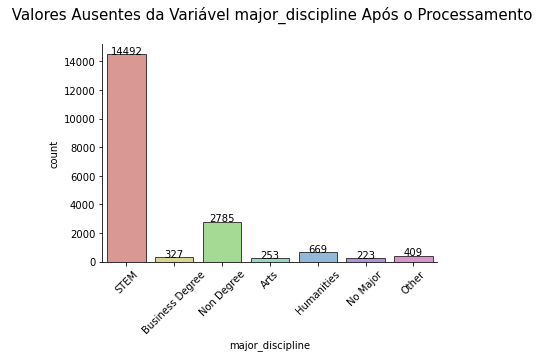

In [49]:
# Valores Ausentes da Variável major_discipline Após o Processamento
sns.countplot(data = new_df.fillna('NaN'), x = 'major_discipline', alpha = 0.7, edgecolor = 'black', palette = 'hls')

# Remove as bordas dos eixos 
sns.despine()
plt.xticks(rotation=45)

# Permite obter os limites atuais do eixo X
bound=ax.get_xbound()

# Retorna o eixo atual em que os dados estão sendo plotados. Esse eixo pode ser usado para personalizar o gráfico. 
ax=plt.gca()

# Adiciona rótulos
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
plt.title(" Valores Ausentes da Variável major_discipline Após o Processamento\n", fontsize = 15)
plt.show()

In [50]:
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.92,>20,no_enrollment,Has relevent experience,Graduate,NaN,STEM,1.0
1,0.776,15,no_enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,NaN,STEM,0.0
3,0.789,<1,NaN,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,>20,no_enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0


#### Variável company_type

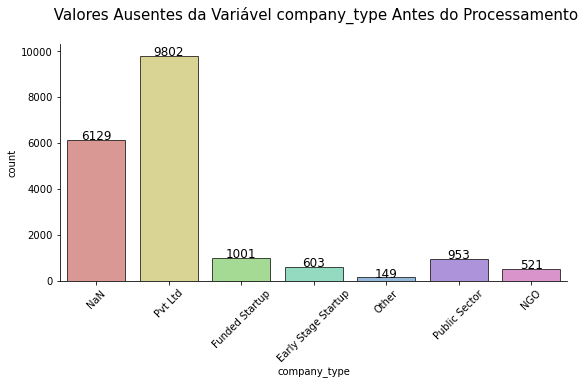

In [51]:
# Plot
plt.figure(figsize = (20, 20))
column_list = ['company_type']
A = 0
for i in column_list:
    A+=1
    plt.subplot(4,2,A)
    ax = sns.countplot(data = new_df.fillna('NaN'), x = i, alpha = 0.7, edgecolor = 'black', palette ='hls')
    # Remove as bordas dos eixos
    sns.despine() 
    plt.title(i, fontsize = 15)
    # Adiciona rótulos
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 12)
        plt.title(" Valores Ausentes da Variável company_type Antes do Processamento\n", fontsize = 15)
    if A >=0:
        plt.xticks(rotation = 45)

In [52]:
new_df['company_type'].value_counts(dropna = False)

Pvt Ltd                9802
NaN                    6129
Funded Startup         1001
Public Sector           953
Early Stage Startup     603
NGO                     521
Other                   149
Name: company_type, dtype: int64

In [53]:
# Índice
nan_index = new_df[(new_df['company_type'].isna())].index

In [54]:
# Imputação dos valores NaN com 'Other'
new_df['company_type'][nan_index] = 'Other'

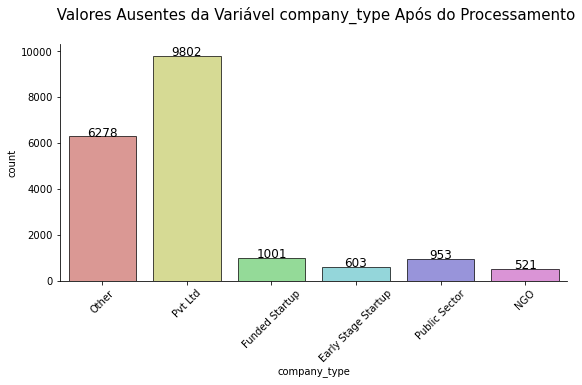

In [55]:
# Plot
plt.figure(figsize = (20, 20))
column_list = ['company_type']
A = 0
for i in column_list:
    A+=1
    plt.subplot(4,2,A)
    ax = sns.countplot(data = new_df.fillna('NaN'), x = i, alpha = 0.7, edgecolor = 'black', palette ='hls')
    # Remove as bordas dos eixos
    sns.despine() 
    plt.title(i, fontsize = 15)
    # Adiciona rótulos
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 12)
        plt.title(" Valores Ausentes da Variável company_type Após do Processamento\n", fontsize = 15)
    if A >=0:
        plt.xticks(rotation = 45)

In [56]:
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.92,>20,no_enrollment,Has relevent experience,Graduate,Other,STEM,1.0
1,0.776,15,no_enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,Other,STEM,0.0
3,0.789,<1,NaN,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,>20,no_enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0


#### Variável education_level

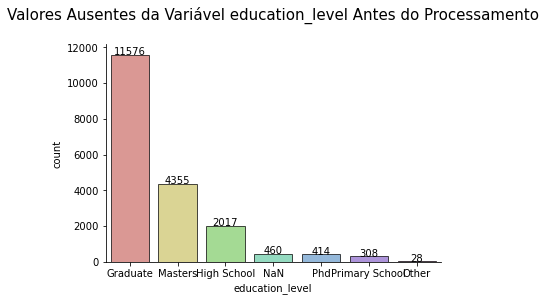

In [57]:
# Plot
sns.countplot(data = new_df.fillna('NaN'), x = 'education_level', alpha = 0.7, edgecolor = 'black', palette = 'hls')

# Remove as bordas dos eixos
sns.despine()
plt.xticks()

# Permite obter os limites atuais do eixo X
bound=ax.get_xbound()

# Retorna o eixo atual em que os dados estão sendo plotados. Esse eixo pode ser usado para personalizar o gráfico. 
ax=plt.gca()

# Adiciona rótulos
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
plt.title("Valores Ausentes da Variável education_level Antes do Processamento\n", fontsize = 15)
plt.show()

In [58]:
# Índice
nan_index = new_df[(new_df['education_level'].isna())].index

In [59]:
# Imputação dos valores NaN com 'Other'
new_df['education_level'][nan_index] = 'Other'

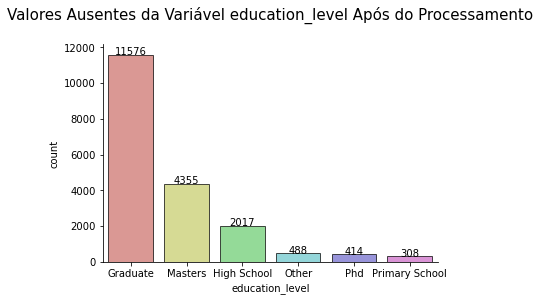

In [60]:
# Plot
sns.countplot(data = new_df.fillna('NaN'), x = 'education_level', alpha = 0.7, edgecolor = 'black', palette = 'hls')

# Remove as bordas dos eixos
sns.despine()
plt.xticks()

# Permite obter os limites atuais do eixo X
bound=ax.get_xbound()

# Retorna o eixo atual em que os dados estão sendo plotados. Esse eixo pode ser usado para personalizar o gráfico. 
ax=plt.gca()

# Adiciona rótulos
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
plt.title("Valores Ausentes da Variável education_level Após do Processamento\n", fontsize = 15)

plt.show()

In [61]:
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.92,>20,no_enrollment,Has relevent experience,Graduate,Other,STEM,1.0
1,0.776,15,no_enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,Other,STEM,0.0
3,0.789,<1,NaN,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,>20,no_enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0


#### Variável enrolled_university

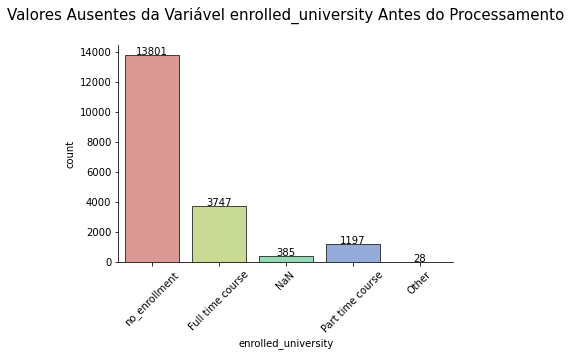

In [62]:
# Plot
sns.countplot(data = new_df.fillna('NaN'), x = 'enrolled_university', alpha = 0.7, edgecolor = 'black', palette = 'hls')

# Remove as bordas dos eixos
sns.despine()
plt.xticks()

# Permite obter os limites atuais do eixo X
bound=ax.get_xbound()

# Retorna o eixo atual em que os dados estão sendo plotados. Esse eixo pode ser usado para personalizar o gráfico. 
ax=plt.gca()

# Adiciona rótulos
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
plt.title("Valores Ausentes da Variável enrolled_university Antes do Processamento\n", fontsize = 15)
plt.xticks(rotation = 45)

plt.show()

In [63]:
print('\nTotal de Valores Ausentes na Variável enrolled_university:', new_df['enrolled_university'].isna().sum())
print('\nProporção de Valores Ausentes na Variável education_level:')
new_df[new_df['enrolled_university'].isna()]['education_level'].value_counts(dropna = False)


Total de Valores Ausentes na Variável enrolled_university: 385

Proporção de Valores Ausentes na Variável education_level:


Graduate          170
Other             100
Masters            53
High School        47
Primary School      9
Phd                 6
Name: education_level, dtype: int64

- Candidatos com `Primary School` como `education_level` não estão qualificados para ingressar na universidade. Devido a isso vamos preencher os valores `NaN` em `education_level` por `Primary Grad`.

In [64]:
# Prepara o índice
nan_index = (new_df[(new_df['enrolled_university'].isna()) & (new_df['education_level']=='Primary School')]).index

In [65]:
len(nan_index)

9

In [66]:
# Imputação de valores ausentes
new_df['enrolled_university'][nan_index] = 'Primary Grad'

In [67]:
print('Total de Valores Ausentes:', new_df['enrolled_university'].isna().sum())
new_df[new_df['enrolled_university'].isna()]['education_level'].value_counts(dropna = False)

Total de Valores Ausentes: 376


Graduate       170
Other          100
Masters         53
High School     47
Phd              6
Name: education_level, dtype: int64

In [68]:
# Prepara o índice
nan_index = new_df[(new_df['enrolled_university'].isna())].index

In [69]:
# O restante colocamos como 'Other'
new_df['enrolled_university'][nan_index] = 'Other'

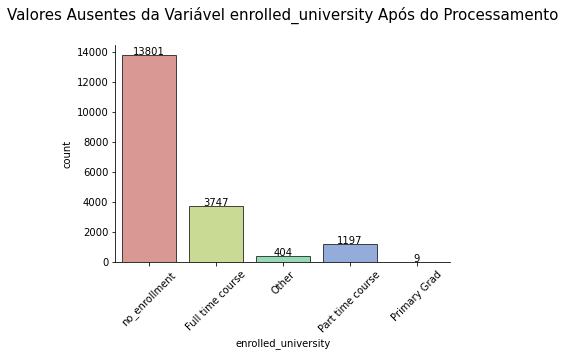

In [70]:
# Plot
sns.countplot(data = new_df.fillna('NaN'), x = 'enrolled_university', alpha = 0.7, edgecolor = 'black', palette = 'hls')

# Remove as bordas dos eixos
sns.despine()
plt.xticks()

# Permite obter os limites atuais do eixo X
bound=ax.get_xbound()

# Retorna o eixo atual em que os dados estão sendo plotados. Esse eixo pode ser usado para personalizar o gráfico. 
ax=plt.gca()

# Adiciona rótulos
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
plt.title("Valores Ausentes da Variável enrolled_university Após do Processamento\n", fontsize = 15)
plt.xticks(rotation = 45)

plt.show()

In [71]:
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.92,>20,no_enrollment,Has relevent experience,Graduate,Other,STEM,1.0
1,0.776,15,no_enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,Other,STEM,0.0
3,0.789,<1,Other,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,>20,no_enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0


#### Variável experience

In [72]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   city_development_index  19158 non-null  object
 1   experience              19095 non-null  object
 2   enrolled_university     19158 non-null  object
 3   relevent_experience     19158 non-null  object
 4   education_level         19158 non-null  object
 5   company_type            19158 non-null  object
 6   major_discipline        19158 non-null  object
 7   target                  19158 non-null  object
dtypes: object(8)
memory usage: 1.2+ MB


In [73]:
new_df['experience'].value_counts(dropna = False)

>20      3281
5        1427
4        1402
3        1351
6        1214
2        1124
7        1028
10        982
9         980
8         802
15        685
11        664
14        586
1         549
<1        520
16        506
12        494
13        399
17        342
19        304
18        279
20        148
NaN        63
Other      28
Name: experience, dtype: int64

In [74]:
# Percentual de valores ausentes
percent_missing = new_df.isnull().sum() / len(new_df) * 100
percent_missing

city_development_index    0.000000
experience                0.328844
enrolled_university       0.000000
relevent_experience       0.000000
education_level           0.000000
company_type              0.000000
major_discipline          0.000000
target                    0.000000
dtype: float64

In [75]:
new_df['experience'].isnull().sum()

63

In [76]:
new_df.shape

(19158, 8)

In [77]:
new_df = new_df.dropna()

In [78]:
new_df.shape

(19095, 8)

In [79]:
percent_missing = new_df.isnull().sum() * 100 / len(new_df)
percent_missing

city_development_index    0.0
experience                0.0
enrolled_university       0.0
relevent_experience       0.0
education_level           0.0
company_type              0.0
major_discipline          0.0
target                    0.0
dtype: float64

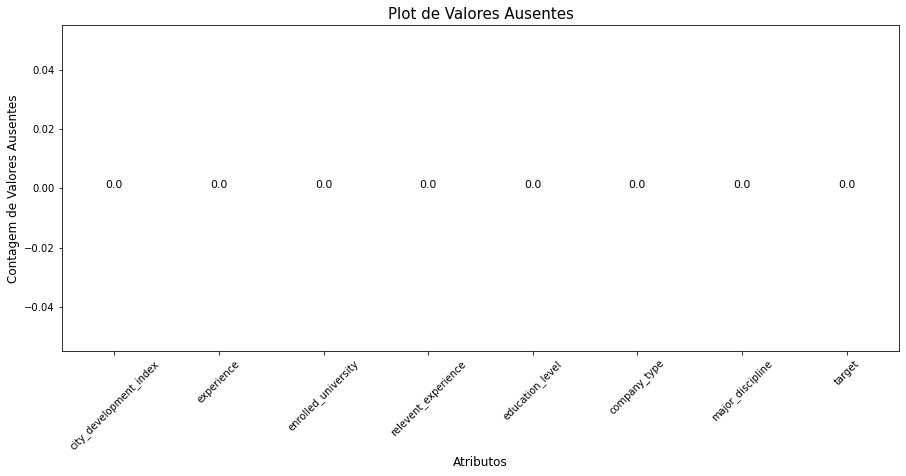

In [80]:
# Valores ausentes por coluna
null_df = new_df.isna().sum().reset_index()

# Figura
ax = plt.figure(figsize = (15,6))

# Barplot
ax = sns.barplot(null_df['index'], null_df[0], palette = 'husl')
plt.xlabel('Atributos', fontsize = 12)
plt.ylabel('Contagem de Valores Ausentes', fontsize = 12)
plt.xticks(rotation = 45)
plt.title("Plot de Valores Ausentes", fontsize = 15)

# Adicionando rótulos
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, (p.get_height())), ha = 'center', color = 'black', size = 11)

plt.show()

## 5. Ajustes finais

In [81]:
# Separando variáveis explicativas da variável alvo
x = new_df.drop(columns = ['target'])
y = new_df['target']

## 6. Relatório final

Com base no que observamos, nossa análise aponta que as variáveis mais pertinentes para identificar um bom candidato são:

- Índice de Desenvolvimento da cidade onde o candidato mora.
- Tempo de experiência profissional.
- Se o candidato está ou não matriculado em um curso universitário.
- Se o candidato tem ou não experiência relevante.
- O nível educacional do candidato.

As variáveis abaixo embora possuam alguma relação com a nossa variável alvo, estatísticamente falando não devem ser usadas para previsão: 

- O tipo de empresa que o candidato trabalhou ou trabalha atualmente.
- A especialização na graduação (quando for o caso).

Não são relevantes para a nossa análise:

- ID do candidato.
- Código da cidade do candidato.
- Gênero.
- A última vez que o candidato esteve empregado.
- Tamanho da empresa.
- Total de horas de treimamento.


**Recomendações do Analista de Dados**:

- O RH pode aperfeiçoar o método de coleta de dados que vem sendo utilizado, para obter mais recursos e com isso melhorar a qualidade dos dados, tornando assim o trabalho de análise mais preciso.

- O RH pode procurar candidatos que vêm de cidades com índice de desenvolvimento urbano mais baixo, sem experiência relevante, nível de educação superior e menor experiência de trabalho para ter uma chance maior de encontrar bons candidatos.

- O RH pode tornar o treinamento mais compacto pois muitas pessoas não necessitam de muito tempo para concluir o treinamento.